# Energy Consumption by Sector Analysis

In [1]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import math
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Change current directory
os.chdir("/Users/justinwinfield/box sync/depaul/classes/capstone/Datafiles")

In [3]:
# Reading in the various consumption datasets for each sector

## Food Services
food_train = pd.read_csv("food_train.csv")
food_test = pd.read_csv("food_test.csv")
food_scenario = pd.read_csv("food_scenario.csv")

## Groceries
grocery_train = pd.read_csv("groc_train.csv")
grocery_test = pd.read_csv("groc_test.csv")
grocery_scenario = pd.read_csv("groc_scenario.csv")

## Health Care
health_train = pd.read_csv("heal_train.csv")
health_test = pd.read_csv("heal_test.csv")
health_scenario = pd.read_csv("heal_scenario.csv")

## School (K-12)
school_train = pd.read_csv("k12_train.csv")
school_test = pd.read_csv("k12_test.csv")
school_scenario = pd.read_csv("k12_scenario.csv")

## Lodging
lodge_train = pd.read_csv("lodg_train.csv")
lodge_test = pd.read_csv("lodg_test.csv")
lodge_scenario = pd.read_csv("lodg_scenario.csv")

## Office
office_train = pd.read_csv("off_train.csv")
office_test = pd.read_csv("off_test.csv")
office_scenario = pd.read_csv("off_scenario.csv")

## Residential
resident_train = pd.read_csv("res_train.csv")
resident_test = pd.read_csv("res_test.csv")
resident_scenario = pd.read_csv("res_scenario.csv")

## Stand Alone Retail
retail_train = pd.read_csv("sar_train.csv")
retail_test = pd.read_csv("sar_test.csv")
retail_scenario = pd.read_csv("sar_scenario.csv")

In [4]:
food_train.head(2)

,Electricity_KW_AVG,Weekend,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Temperature_AVG,Visibility_AVG,Month_1,...,Day_30,Day_31,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Summer,Season_Winter
0,8128.774881,1,0,-14.264263,0.270833,-7.075000,0.740,-2.750000,18.033333,0,...,0,0,0,0,0,0,0,1,0,0
1,8063.287566,0,1,13.991107,0.033333,4.720833,0.615,12.645833,24.100000,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
grocery_train.head(2)

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Temperature_AVG,Visibility_AVG,Month_1,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1687.204479,1,0,0,-14.264263,0.270833,-7.075000,-2.750000,18.033333,0,...,0,0,0,0,0,0,1,0,0,0
1,2228.143477,0,0,1,13.991107,0.033333,4.720833,12.645833,24.100000,0,...,0,1,0,0,0,0,0,1,0,0


In [6]:
health_train.head(2)

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Temperature_AVG,Visibility_AVG,Month_1,...,Day_29,Day_31,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Season_Spring,Season_Winter
0,2969.613377,1,0,0,-14.264263,0.270833,-7.075000,-2.750000,18.033333,0,...,0,0,0,0,0,0,0,0,0,0
1,4785.285051,0,0,1,13.991107,0.033333,4.720833,12.645833,24.100000,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
school_train.head(2)

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Temperature_AVG,Visibility_AVG,...,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1718.456592,1,0,0,-14.264263,0.270833,-7.075000,0.740,-2.750000,18.033333,...,0,0,0,0,0,1,1,0,0,0
1,3825.525482,0,0,1,13.991107,0.033333,4.720833,0.615,12.645833,24.100000,...,1,0,0,0,0,0,0,1,0,0


In [8]:
lodge_train.head(2)

,Electricity_KW_AVG,Weekend,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Temperature_AVG,Visibility_AVG,Month_1,Month_3,...,Day_22,Day_23,Day_24,Day_29,Day_30,Day_31,Day_of_week_5,Season_Autumn,Season_Spring,Season_Summer
0,1313.899422,1,0,-14.264263,0.270833,-7.075000,-2.750000,18.033333,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1355.254822,0,1,13.991107,0.033333,4.720833,12.645833,24.100000,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
office_train.head(2)

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Temperature_AVG,Visibility_AVG,Month_1,...,Day_31,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,5826.30396,1,0,0,-14.264263,-7.075000,0.740,-2.750000,18.033333,0,...,0,0,0,0,0,0,1,0,0,0
1,15538.64982,0,0,1,13.991107,4.720833,0.615,12.645833,24.100000,0,...,0,0,1,0,0,0,0,1,0,0


In [101]:
resident_train.head(2)

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Temperature_AVG,Visibility_AVG,...,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,59562.88724,1,0,0,-14.264263,0.270833,-7.075000,0.740,-2.750000,18.033333,...,0,0,0,0,0,1,1,0,0,0
1,60357.63309,0,0,1,13.991107,0.033333,4.720833,0.615,12.645833,24.100000,...,1,0,0,0,0,0,0,1,0,0


In [102]:
retail_train.head(2)

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Temperature_AVG,Visibility_AVG,Month_1,...,Day_25,Day_26,Day_27,Day_29,Day_31,Day_of_week_1,Day_of_week_3,Day_of_week_5,Day_of_week_6,Season_Winter
0,916.454986,1,0,0,-14.264263,0.270833,-7.075000,-2.750000,18.033333,0,...,0,0,0,0,0,0,0,0,0,0
1,1395.629489,0,0,1,13.991107,0.033333,4.720833,12.645833,24.100000,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
print(f" Shape of Food Service Sector: {food_train.shape}")
print(f" Shape of Grocery Sector: {grocery_train.shape}")
print(f" Shape of Health Care: {health_train.shape}")
print(f" Shape of School K-12: {school_train.shape}")
print(f" Shape of Lodging: {lodge_train.shape}")
print(f" Shape of Office: {office_train.shape}")
print(f" Shape of Residential: {resident_train.shape}")
print(f" Shape of Retail: {retail_train.shape}")

 Shape of Food Service Sector: (292, 51)
 Shape of Grocery Sector: (292, 43)
 Shape of Health Care: (292, 48)
 Shape of School K-12: (292, 53)
 Shape of Lodging: (292, 34)
 Shape of Office: (292, 59)
 Shape of Residential: (292, 62)
 Shape of Retail: (292, 41)


## Exploration

In [13]:
food_train.describe(include="all")

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,...,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,8398.615051,0.284247,0.027397,0.465753,0.341100,0.640304,3.861284,17.014542,8.683634,14.372837,...,0.154110,0.147260,0.133562,0.136986,0.143836,0.150685,0.250000,0.256849,0.253425,0.239726
std,535.824742,0.451829,0.163518,0.499682,13.412184,0.301929,10.619189,9.975483,11.217889,5.408390,...,0.361674,0.354974,0.340765,0.344423,0.351525,0.358356,0.433756,0.437646,0.435719,0.427649
min,7986.469379,0.000000,0.000000,0.000000,-18.802693,0.000000,-22.129167,3.625000,-17.966667,1.141667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8120.153657,0.000000,0.000000,0.000000,-12.994419,0.400000,-4.214810,8.760417,0.086458,10.408333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8170.834229,0.000000,0.000000,0.000000,0.541754,0.675000,5.104167,14.708333,9.641667,14.497917,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8480.373562,1.000000,0.000000,1.000000,13.839167,0.912500,13.014583,24.031250,18.543750,18.371875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,0.000000
max,10676.092180,1.000000,1.000000,1.000000,18.824076,1.000000,22.800000,43.833333,28.845833,26.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
grocery_train.describe(include="all")

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,...,Day_15,Day_20,Day_23,Day_24,Day_29,Day_of_week_1,Day_of_week_2,Day_of_week_5,Day_of_week_6,Season_Autumn
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,2259.508504,0.284247,0.027397,0.465753,0.341100,0.640304,3.861284,17.014542,8.683634,14.372837,...,0.030822,0.034247,0.027397,0.030822,0.034247,0.133562,0.154110,0.136986,0.143836,0.250000
std,320.368143,0.451829,0.163518,0.499682,13.412184,0.301929,10.619189,9.975483,11.217889,5.408390,...,0.173132,0.182174,0.163518,0.173132,0.182174,0.340765,0.361674,0.344423,0.351525,0.433756
min,1679.739825,0.000000,0.000000,0.000000,-18.802693,0.000000,-22.129167,3.625000,-17.966667,1.141667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2065.920296,0.000000,0.000000,0.000000,-12.994419,0.400000,-4.214810,8.760417,0.086458,10.408333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2153.730300,0.000000,0.000000,0.000000,0.541754,0.675000,5.104167,14.708333,9.641667,14.497917,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2466.132634,1.000000,0.000000,1.000000,13.839167,0.912500,13.014583,24.031250,18.543750,18.371875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
max,3124.744278,1.000000,1.000000,1.000000,18.824076,1.000000,22.800000,43.833333,28.845833,26.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
health_train.describe(include="all")

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,...,Day_27,Day_31,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Season_Summer,Season_Winter
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,4143.694524,0.284247,0.027397,0.465753,0.341100,0.640304,3.861284,17.014542,8.683634,14.372837,...,0.041096,0.020548,0.133562,0.154110,0.147260,0.133562,0.136986,0.143836,0.253425,0.239726
std,617.540433,0.451829,0.163518,0.499682,13.412184,0.301929,10.619189,9.975483,11.217889,5.408390,...,0.198853,0.142109,0.340765,0.361674,0.354974,0.340765,0.344423,0.351525,0.435719,0.427649
min,2371.634271,0.000000,0.000000,0.000000,-18.802693,0.000000,-22.129167,3.625000,-17.966667,1.141667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3792.199363,0.000000,0.000000,0.000000,-12.994419,0.400000,-4.214810,8.760417,0.086458,10.408333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4175.249687,0.000000,0.000000,0.000000,0.541754,0.675000,5.104167,14.708333,9.641667,14.497917,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4693.673373,1.000000,0.000000,1.000000,13.839167,0.912500,13.014583,24.031250,18.543750,18.371875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5038.046148,1.000000,1.000000,1.000000,18.824076,1.000000,22.800000,43.833333,28.845833,26.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
school_train.describe(include="all")

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,...,Day_30,Day_31,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Summer,Season_Winter
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,3210.834353,0.284247,0.027397,0.465753,0.341100,0.640304,3.861284,17.014542,8.683634,14.372837,...,0.027397,0.020548,0.154110,0.147260,0.133562,0.136986,0.143836,0.150685,0.253425,0.239726
std,1111.207789,0.451829,0.163518,0.499682,13.412184,0.301929,10.619189,9.975483,11.217889,5.408390,...,0.163518,0.142109,0.361674,0.354974,0.340765,0.344423,0.351525,0.358356,0.435719,0.427649
min,1429.055782,0.000000,0.000000,0.000000,-18.802693,0.000000,-22.129167,3.625000,-17.966667,1.141667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1774.694360,0.000000,0.000000,0.000000,-12.994419,0.400000,-4.214810,8.760417,0.086458,10.408333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3688.136162,0.000000,0.000000,0.000000,0.541754,0.675000,5.104167,14.708333,9.641667,14.497917,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3761.818932,1.000000,0.000000,1.000000,13.839167,0.912500,13.014583,24.031250,18.543750,18.371875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6642.780380,1.000000,1.000000,1.000000,18.824076,1.000000,22.800000,43.833333,28.845833,26.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
lodge_train.describe(include="all")

,Electricity_KW_AVG,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,Month_1,Month_3,...,Day_10,Day_14,Day_15,Day_20,Day_21,Day_23,Day_24,Day_of_week_1,Day_of_week_5,Season_Autumn
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,1439.273727,0.465753,0.341100,0.640304,3.861284,17.014542,8.683634,14.372837,0.085616,0.082192,...,0.034247,0.034247,0.030822,0.034247,0.037671,0.027397,0.030822,0.133562,0.136986,0.250000
std,166.453778,0.499682,13.412184,0.301929,10.619189,9.975483,11.217889,5.408390,0.280277,0.275128,...,0.182174,0.182174,0.173132,0.182174,0.190727,0.163518,0.173132,0.340765,0.344423,0.433756
min,1230.396580,0.000000,-18.802693,0.000000,-22.129167,3.625000,-17.966667,1.141667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1303.844664,0.000000,-12.994419,0.400000,-4.214810,8.760417,0.086458,10.408333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1392.548540,0.000000,0.541754,0.675000,5.104167,14.708333,9.641667,14.497917,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1538.309166,1.000000,13.839167,0.912500,13.014583,24.031250,18.543750,18.371875,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
max,1918.962430,1.000000,18.824076,1.000000,22.800000,43.833333,28.845833,26.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
office_train.describe(include="all")

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Precipitable_Water_AVG,Temperature_AVG,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,16494.671890,0.284247,0.027397,0.465753,0.341100,0.640304,3.861284,0.748364,17.014542,8.683634,...,0.133562,0.154110,0.147260,0.133562,0.136986,0.143836,0.250000,0.256849,0.253425,0.239726
std,5937.957254,0.451829,0.163518,0.499682,13.412184,0.301929,10.619189,0.120218,9.975483,11.217889,...,0.340765,0.361674,0.354974,0.340765,0.344423,0.351525,0.433756,0.437646,0.435719,0.427649
min,4669.542940,0.000000,0.000000,0.000000,-18.802693,0.000000,-22.129167,0.370000,3.625000,-17.966667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13417.391470,0.000000,0.000000,0.000000,-12.994419,0.400000,-4.214810,0.675833,8.760417,0.086458,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17356.218090,0.000000,0.000000,0.000000,0.541754,0.675000,5.104167,0.757917,14.708333,9.641667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19939.785905,1.000000,0.000000,1.000000,13.839167,0.912500,13.014583,0.830104,24.031250,18.543750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,0.000000
max,31855.632480,1.000000,1.000000,1.000000,18.824076,1.000000,22.800000,0.996667,43.833333,28.845833,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
resident_train.head(2)

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Precipitable_Water_AVG,Temperature_AVG,...,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,59562.88724,1,0,0,-14.264263,0.270833,-7.075000,0.740,7.291667,-2.750000,...,0,0,0,0,0,1,1,0,0,0
1,60357.63309,0,0,1,13.991107,0.033333,4.720833,0.615,14.166667,12.645833,...,1,0,0,0,0,0,0,1,0,0


In [20]:
retail_train.describe(include="all")

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,...,Day_23,Day_24,Day_25,Day_29,Day_of_week_1,Day_of_week_3,Day_of_week_5,Day_of_week_6,Season_Summer,Season_Winter
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,1420.217860,0.284247,0.027397,0.465753,0.341100,0.640304,3.861284,17.014542,8.683634,14.372837,...,0.027397,0.030822,0.023973,0.034247,0.133562,0.147260,0.136986,0.143836,0.253425,0.239726
std,253.390144,0.451829,0.163518,0.499682,13.412184,0.301929,10.619189,9.975483,11.217889,5.408390,...,0.163518,0.173132,0.153226,0.182174,0.340765,0.354974,0.344423,0.351525,0.435719,0.427649
min,840.662624,0.000000,0.000000,0.000000,-18.802693,0.000000,-22.129167,3.625000,-17.966667,1.141667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1390.765023,0.000000,0.000000,0.000000,-12.994419,0.400000,-4.214810,8.760417,0.086458,10.408333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1449.378224,0.000000,0.000000,0.000000,0.541754,0.675000,5.104167,14.708333,9.641667,14.497917,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1498.567071,1.000000,0.000000,1.000000,13.839167,0.912500,13.014583,24.031250,18.543750,18.371875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2159.254183,1.000000,1.000000,1.000000,18.824076,1.000000,22.800000,43.833333,28.845833,26.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Getting information for each of the data elements
health_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 44 columns):
Electricity_KW_AVG          292 non-null float64
Weekend                     292 non-null int64
Holiday                     292 non-null int64
School_Day                  292 non-null int64
Solar_Elevation_AVG         292 non-null float64
Cloud_Cover_Fraction_AVG    292 non-null float64
Dew_Point_AVG               292 non-null float64
Precipitable_Water_AVG      292 non-null float64
Temperature_AVG             292 non-null float64
Visibility_AVG              292 non-null float64
Month_2                     292 non-null int64
Month_4                     292 non-null int64
Month_6                     292 non-null int64
Month_7                     292 non-null int64
Month_9                     292 non-null int64
Month_10                    292 non-null int64
Month_12                    292 non-null int64
Day_1                       292 non-null int64
Day_3                       292 non

#### Note
Since Month1 ---> Day_of_week_1 are categorical variables, I'm going to explore the data between the continuous variables

## Visualizations

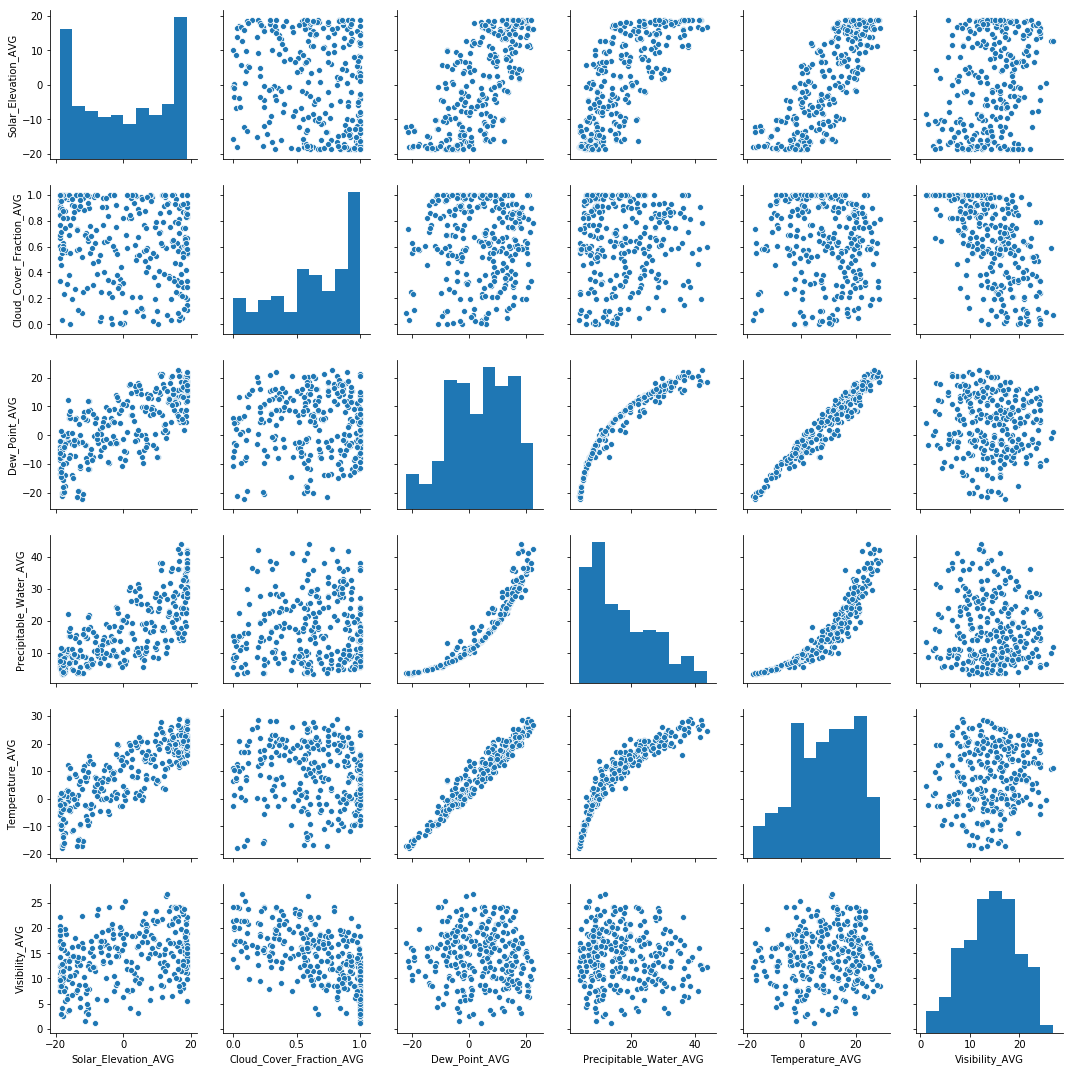

In [22]:
explore_fs = food_train.iloc[:,4:10]
plt.figure(figsize=[12,12])
sns.pairplot(data=explore_fs)

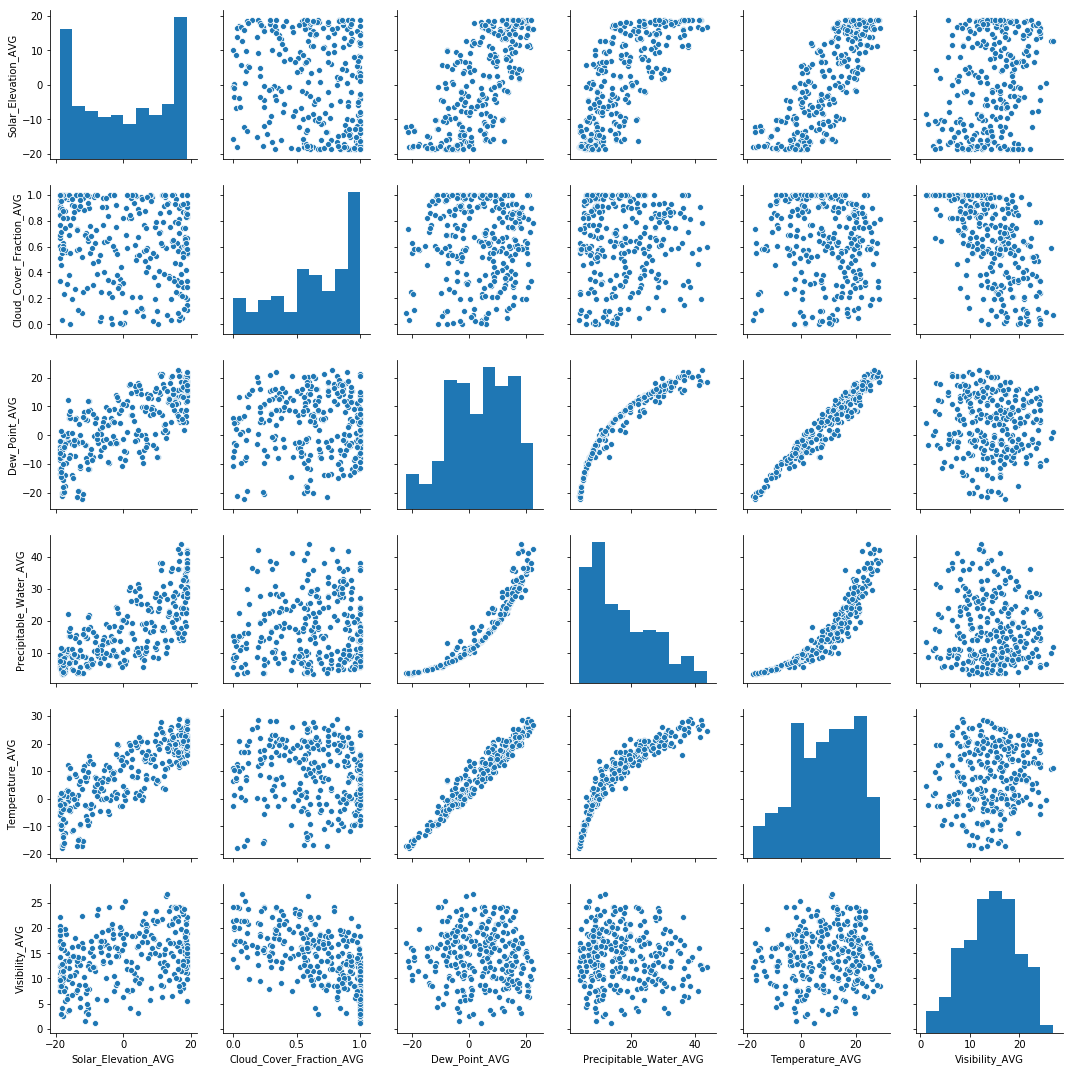

In [23]:
explore_groc = grocery_train.iloc[:,4:10]
plt.figure(figsize=[12,12])
sns.pairplot(data=explore_groc)

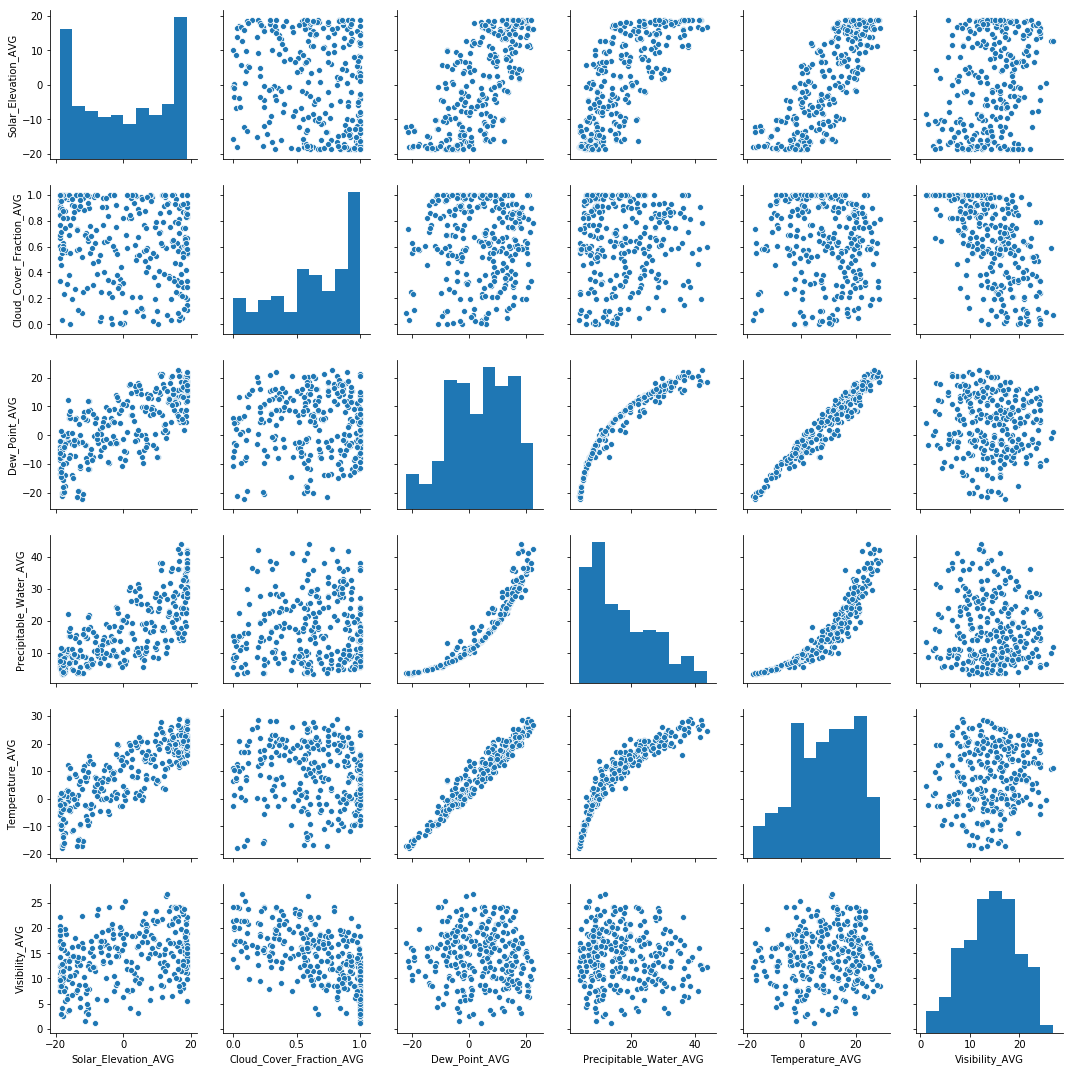

In [24]:
explore_health = health_train.iloc[:,4:10]
plt.figure(figsize=[12,12])
sns.pairplot(data=explore_health)

## Preprocessing

In [4]:
# split X and Y -- Food Services

food_train_attr = food_train.drop(columns=["Electricity_KW_AVG"], axis=1)
food_train_target = food_train["Electricity_KW_AVG"]

## Test Dataset
food_test_attr = food_test.drop(columns=["Electricity_KW_AVG"], axis=1)
food_test_target = food_test["Electricity_KW_AVG"]

In [5]:
# split X and Y -- Groceries

grocery_train_attr = grocery_train.drop(columns=["Electricity_KW_AVG"], axis=1)
grocery_train_target = grocery_train["Electricity_KW_AVG"]

## Test Dataset
grocery_test_attr = grocery_test.drop(columns=["Electricity_KW_AVG"], axis=1)
grocery_test_target = grocery_test["Electricity_KW_AVG"]

In [6]:
# split X and Y - Health

health_train_attr = health_train.drop(columns=["Electricity_KW_AVG"], axis=1)
health_train_target = health_train["Electricity_KW_AVG"]

## Test Dataset
health_test_attr = health_test.drop(columns=["Electricity_KW_AVG"], axis=1)
health_test_target = health_test["Electricity_KW_AVG"]

In [7]:
# split X and Y -- School

school_train_attr = school_train.drop(columns=["Electricity_KW_AVG"], axis=1)
school_train_target = school_train["Electricity_KW_AVG"]

## Test Dataset
school_test_attr = school_test.drop(columns=["Electricity_KW_AVG"], axis=1)
school_test_target = school_test["Electricity_KW_AVG"]

In [8]:
# split X and Y - Lodging

lodge_train_attr = lodge_train.drop(columns=["Electricity_KW_AVG"], axis=1)
lodge_train_target = lodge_train["Electricity_KW_AVG"]

## Test Dataset
lodge_test_attr = lodge_test.drop(columns=["Electricity_KW_AVG"], axis=1)
lodge_test_target = lodge_test["Electricity_KW_AVG"]

In [9]:
# split X and Y -- Office

office_train_attr = office_train.drop(columns=["Electricity_KW_AVG"], axis=1)
office_train_target = office_train["Electricity_KW_AVG"]

## Test Dataset
office_test_attr = office_test.drop(columns=["Electricity_KW_AVG"], axis=1)
office_test_target = office_test["Electricity_KW_AVG"]

In [10]:
# split X and Y -- Residential

resident_train_attr = resident_train.drop(columns=["Electricity_KW_AVG"], axis=1)
resident_train_target = resident_train["Electricity_KW_AVG"]

## Test Dataset
resident_test_attr = resident_test.drop(columns=["Electricity_KW_AVG"], axis=1)
resident_test_target = resident_test["Electricity_KW_AVG"]

In [11]:
# split X and Y -- Stand Alone Retail

retail_train_attr = retail_train.drop(columns=["Electricity_KW_AVG"], axis=1)
retail_train_target = retail_train["Electricity_KW_AVG"]

## Test Dataset
retail_test_attr = retail_test.drop(columns=["Electricity_KW_AVG"], axis=1)
retail_test_target = retail_test["Electricity_KW_AVG"]

In [114]:
food_train_attr.head(2)

,Weekend,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Temperature_AVG,Visibility_AVG,Month_1,Month_2,...,Day_30,Day_31,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Summer,Season_Winter
0,1,0,-14.264263,0.270833,-7.075000,0.740,-2.750000,18.033333,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,13.991107,0.033333,4.720833,0.615,12.645833,24.100000,0,0,...,0,0,1,0,0,0,0,0,0,0


In [115]:
food_train_target.head(2)

0    8128.774881
1    8063.287566
Name: Electricity_KW_AVG, dtype: float64

In [12]:
# Convert to Numpy array for modeling

## Food Services
x_train_food = np.asarray(food_train_attr)
y_train_food = np.asarray(food_train_target)
x_test_food = np.asarray(food_test_attr)
y_test_food = np.asarray(food_test_target)

## Groceries
x_train_grocery = np.asarray(grocery_train_attr)
y_train_grocery = np.asarray(grocery_train_target)
x_test_grocery = np.asarray(grocery_test_attr)
y_test_grocery = np.asarray(grocery_test_target)


## Health Care
x_train_health = np.asarray(health_train_attr)
y_train_health = np.asarray(health_train_target)
x_test_health = np.asarray(health_test_attr)
y_test_health = np.asarray(health_test_target)

## School (K-12)
x_train_school = np.asarray(school_train_attr)
y_train_school = np.asarray(school_train_target)
x_test_school = np.asarray(school_test_attr)
y_test_school = np.asarray(school_test_target)

## Lodging
x_train_lodge = np.asarray(lodge_train_attr)
y_train_lodge = np.asarray(lodge_train_target)
x_test_lodge = np.asarray(lodge_test_attr)
y_test_lodge = np.asarray(lodge_test_target)

## Office
x_train_office = np.asarray(office_train_attr)
y_train_office = np.asarray(office_train_target)
x_test_office = np.asarray(office_test_attr)
y_test_office = np.asarray(office_test_target)

## Residential
x_train_resident = np.asarray(resident_train_attr)
y_train_resident = np.asarray(resident_train_target)
x_test_resident = np.asarray(resident_test_attr)
y_test_resident = np.asarray(resident_test_target)

## Stand Alone Retail
x_train_retail = np.asarray(retail_train_attr)
y_train_retail = np.asarray(retail_train_target)
x_test_retail = np.asarray(retail_test_attr)
y_test_retail = np.asarray(retail_test_target)

In [13]:
# Set random seed to get the same results after each run
random_seed = 213

In [14]:
# double check the shape of each of the train/test of X and Y
print(f"-----FOOD SERVICES-----")
print(f"Shape of x_train: {x_train_food.shape}")
print(f"Shape of x_test: {x_test_food.shape}")
print(f"Shape of y_train: {y_train_food.shape}")
print(f"Shape of y_test: {y_test_food.shape}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Shape of x_train: {x_train_grocery.shape}")
print(f"Shape of x_test: {x_test_grocery.shape}")
print(f"Shape of y_train: {y_train_grocery.shape}")
print(f"Shape of y_test: {y_test_grocery.shape}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Shape of x_train: {x_train_health.shape}")
print(f"Shape of x_test: {x_test_health.shape}")
print(f"Shape of y_train: {y_train_health.shape}")
print(f"Shape of y_test: {y_test_health.shape}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Shape of x_train: {x_train_school.shape}")
print(f"Shape of x_test: {x_test_school.shape}")
print(f"Shape of y_train: {y_train_school.shape}")
print(f"Shape of y_test: {y_test_school.shape}")
print("\n")

print(f"-----LODGING-----")
print(f"Shape of x_train: {x_train_lodge.shape}")
print(f"Shape of x_test: {x_test_lodge.shape}")
print(f"Shape of y_train: {y_train_lodge.shape}")
print(f"Shape of y_test: {y_test_lodge.shape}")
print("\n")

print(f"-----OFFICE-----")
print(f"Shape of x_train: {x_train_office.shape}")
print(f"Shape of x_test: {x_test_office.shape}")
print(f"Shape of y_train: {y_train_office.shape}")
print(f"Shape of y_test: {y_test_office.shape}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Shape of x_train: {x_train_resident.shape}")
print(f"Shape of x_test: {x_test_resident.shape}")
print(f"Shape of y_train: {y_train_resident.shape}")
print(f"Shape of y_test: {y_test_resident.shape}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Shape of x_train: {x_train_retail.shape}")
print(f"Shape of x_test: {x_test_retail.shape}")
print(f"Shape of y_train: {y_train_retail.shape}")
print(f"Shape of y_test: {y_test_retail.shape}")

-----FOOD SERVICES-----
Shape of x_train: (292, 50)
Shape of x_test: (73, 50)
Shape of y_train: (292,)
Shape of y_test: (73,)


-----GROCERIES-----
Shape of x_train: (292, 42)
Shape of x_test: (73, 42)
Shape of y_train: (292,)
Shape of y_test: (73,)


-----HEALTH CARE-----
Shape of x_train: (292, 47)
Shape of x_test: (73, 47)
Shape of y_train: (292,)
Shape of y_test: (73,)


-----SCHOOL-----
Shape of x_train: (292, 52)
Shape of x_test: (73, 52)
Shape of y_train: (292,)
Shape of y_test: (73,)


-----LODGING-----
Shape of x_train: (292, 33)
Shape of x_test: (73, 33)
Shape of y_train: (292,)
Shape of y_test: (73,)


-----OFFICE-----
Shape of x_train: (292, 58)
Shape of x_test: (73, 58)
Shape of y_train: (292,)
Shape of y_test: (73,)


-----RESIDENTIAL-----
Shape of x_train: (292, 61)
Shape of x_test: (73, 61)
Shape of y_train: (292,)
Shape of y_test: (73,)


-----STAND ALONE RETAIL-----
Shape of x_train: (292, 40)
Shape of x_test: (73, 40)
Shape of y_train: (292,)
Shape of y_test: (73,)


# Results

# Model Building 

We're going to be using Sci-kit learn packages to determine how well the models I've selected performs. We're are using RMSE and Explained Variance as our metric for model performance

## Neural Network

In [15]:
# Neural Network
food_nn = MLPRegressor(activation="relu", solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(96,), random_state=random_seed, verbose=True)
grocery_nn = MLPRegressor(activation="relu", solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(96,), random_state=random_seed, verbose=True)
health_nn = MLPRegressor(activation="relu", solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(96,), random_state=random_seed, verbose=True)
school_nn = MLPRegressor(activation="relu", solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(96,), random_state=random_seed, verbose=True)
lodge_nn = MLPRegressor(activation="relu", solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(96,), random_state=random_seed, verbose=True)
office_nn = MLPRegressor(activation="relu", solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(96,), random_state=random_seed, verbose=True)
resident_nn = MLPRegressor(activation="relu", solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(96,), random_state=random_seed, verbose=True)
retail_nn = MLPRegressor(activation="relu", solver='lbfgs', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(96,), random_state=random_seed, verbose=True)

In [16]:
# Model Fitting
food_nn.fit(x_train_food, y_train_food)
grocery_nn.fit(x_train_grocery, y_train_grocery)
health_nn.fit(x_train_health, y_train_health)
school_nn.fit(x_train_school, y_train_school)
lodge_nn.fit(x_train_lodge, y_train_lodge)
office_nn.fit(x_train_office, y_train_office)
resident_nn.fit(x_train_resident, y_train_resident)
retail_nn.fit(x_train_retail, y_train_retail)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(96,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=213, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [17]:
# Predictions
food_pred_nn = food_nn.predict(x_test_food)
grocery_pred_nn = grocery_nn.predict(x_test_grocery)
health_pred_nn = health_nn.predict(x_test_health)
school_pred_nn = school_nn.predict(x_test_school)
lodge_pred_nn = lodge_nn.predict(x_test_lodge)
office_pred_nn = office_nn.predict(x_test_office)
resident_pred_nn = resident_nn.predict(x_test_resident)
retail_pred_nn = retail_nn.predict(x_test_retail)

In [18]:
# scoring
print(f"-----FOOD SERVICES-----")
print(f"Scoring on Training: {food_nn.score(x_train_food, y_train_food):.4f}")      
print(f"Scoring on Testing: {food_nn.score(x_test_food, y_test_food):.4f}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Scoring on Training: {grocery_nn.score(x_train_grocery, y_train_grocery):.4f}")      
print(f"Scoring on Testing: {grocery_nn.score(x_test_grocery, y_test_grocery):.4f}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Scoring on Training: {health_nn.score(x_train_health, y_train_health):.4f}")      
print(f"Scoring on Testing: {health_nn.score(x_test_health, y_test_health):.4f}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Scoring on Training: {school_nn.score(x_train_school, y_train_school):.4f}")      
print(f"Scoring on Testing: {school_nn.score(x_test_school, y_test_school):.4f}")
print("\n")

print(f"-----LODGING-----")
print(f"Scoring on Training: {lodge_nn.score(x_train_lodge, y_train_lodge):.4f}")      
print(f"Scoring on Testing: {lodge_nn.score(x_test_lodge, y_test_lodge):.4f}")
print("\n")

print(f"-----OFFICE-----")
print(f"Scoring on Training: {office_nn.score(x_train_office, y_train_office):.4f}")      
print(f"Scoring on Testing: {office_nn.score(x_test_office, y_test_office):.4f}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Scoring on Training: {resident_nn.score(x_train_resident, y_train_resident):.4f}")      
print(f"Scoring on Testing: {resident_nn.score(x_test_resident, y_test_resident):.4f}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Scoring on Training: {retail_nn.score(x_train_retail, y_train_retail):.4f}")      
print(f"Scoring on Testing: {retail_nn.score(x_test_retail, y_test_retail):.4f}")

-----FOOD SERVICES-----
Scoring on Training: 0.9957
Scoring on Testing: 0.9005


-----GROCERIES-----
Scoring on Training: 0.9975
Scoring on Testing: 0.9707


-----HEALTH CARE-----
Scoring on Training: 0.9965
Scoring on Testing: 0.9175


-----SCHOOL-----
Scoring on Training: 0.9993
Scoring on Testing: 0.8285


-----LODGING-----
Scoring on Training: 0.9972
Scoring on Testing: 0.9007


-----OFFICE-----
Scoring on Training: 0.9957
Scoring on Testing: 0.8349


-----RESIDENTIAL-----
Scoring on Training: 0.9995
Scoring on Testing: 0.9681


-----STAND ALONE RETAIL-----
Scoring on Training: 0.9945
Scoring on Testing: 0.9070


In [19]:
# performance
print(f"-----FOOD SERVICES-----")
print(f"Overall Training Accuracy for Neural Network: {food_nn.score(x_train_food, y_train_food).mean():.4f} +/- {food_nn.score(x_train_food, y_train_food).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {food_nn.score(x_test_food, y_test_food).mean():.4f} +/- {food_nn.score(x_test_food, y_test_food).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_food, food_pred_nn)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_food, food_pred_nn):.4f}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Overall Training Accuracy for Neural Network: {grocery_nn.score(x_train_grocery, y_train_grocery).mean():.4f} +/- {grocery_nn.score(x_train_grocery, y_train_grocery).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {grocery_nn.score(x_test_grocery, y_test_grocery).mean():.4f} +/- {grocery_nn.score(x_test_grocery, y_test_grocery).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_grocery, grocery_pred_nn)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_grocery, grocery_pred_nn):.4f}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Overall Training Accuracy for Neural Network: {health_nn.score(x_train_health, y_train_health).mean():.4f} +/- {health_nn.score(x_train_health, y_train_health).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {health_nn.score(x_test_health, y_test_health).mean():.4f} +/- {health_nn.score(x_test_health, y_test_health).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_health, health_pred_nn)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_health, health_pred_nn):.4f}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Overall Training Accuracy for Neural Network: {school_nn.score(x_train_school, y_train_school).mean():.4f} +/- {school_nn.score(x_train_school, y_train_school).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {school_nn.score(x_test_school, y_test_school).mean():.4f} +/- {school_nn.score(x_test_school, y_test_school).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_school, school_pred_nn)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_school, school_pred_nn):.4f}")
print("\n")

print(f"-----LODGING-----")
print(f"Overall Training Accuracy for Neural Network: {lodge_nn.score(x_train_lodge, y_train_lodge).mean():.4f} +/- {lodge_nn.score(x_train_lodge, y_train_lodge).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {lodge_nn.score(x_test_lodge, y_test_lodge).mean():.4f} +/- {lodge_nn.score(x_test_lodge, y_test_lodge).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_lodge, lodge_pred_nn)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_lodge, lodge_pred_nn):.4f}")
print("\n")

print(f"-----OFFICE-----")
print(f"Overall Training Accuracy for Neural Network: {office_nn.score(x_train_office, y_train_office).mean():.4f} +/- {office_nn.score(x_train_office, y_train_office).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {office_nn.score(x_test_office, y_test_office).mean():.4f} +/- {office_nn.score(x_test_office, y_test_office).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_office, office_pred_nn)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_office, office_pred_nn):.4f}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Overall Training Accuracy for Neural Network: {resident_nn.score(x_train_resident, y_train_resident).mean():.4f} +/- {resident_nn.score(x_train_resident, y_train_resident).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {resident_nn.score(x_test_resident, y_test_resident).mean():.4f} +/- {resident_nn.score(x_test_resident, y_test_resident).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_resident, resident_pred_nn)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_resident, resident_pred_nn):.4f}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Overall Training Accuracy for Neural Network: {retail_nn.score(x_train_retail, y_train_retail).mean():.4f} +/- {retail_nn.score(x_train_retail, y_train_retail).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {retail_nn.score(x_test_retail, y_test_retail).mean():.4f} +/- {retail_nn.score(x_test_retail, y_test_retail).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_retail, retail_pred_nn)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_retail, retail_pred_nn):.4f}")

-----FOOD SERVICES-----
Overall Training Accuracy for Neural Network: 0.9957 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9005 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 148.0739
---------------------------------------------
R2 Score for Neural Network: 0.9005


-----GROCERIES-----
Overall Training Accuracy for Neural Network: 0.9975 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9707 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 59.5006
---------------------------------------------
R2 Score for Neural Network: 0.9707


-----HEALTH CARE-----
Overall Training Accuracy for Neural Network: 0.9965 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9175 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 162.2221
---------------------------------------------
R2 Score for Neural Network: 0.9175


-----SCHOOL-----
Overall Training Accuracy f

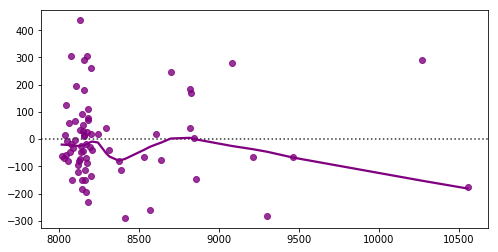

In [20]:
# Visualizations
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=food_pred_nn, lowess=True, color="purple")

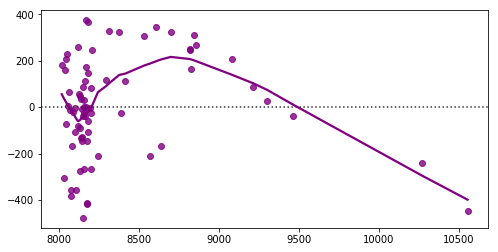

In [21]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=grocery_pred_nn, lowess=True, color="purple")

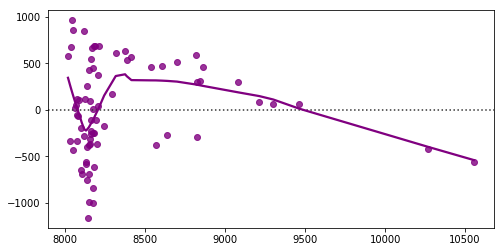

In [22]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=health_pred_nn, lowess=True, color="purple")

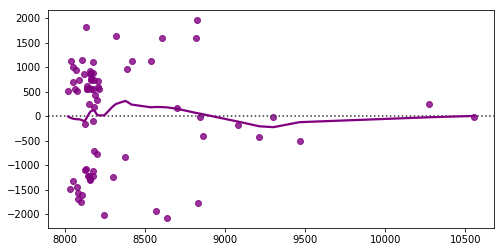

In [23]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=school_pred_nn, lowess=True, color="purple")

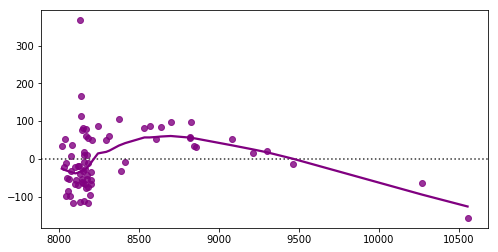

In [24]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=lodge_pred_nn, lowess=True, color="purple")

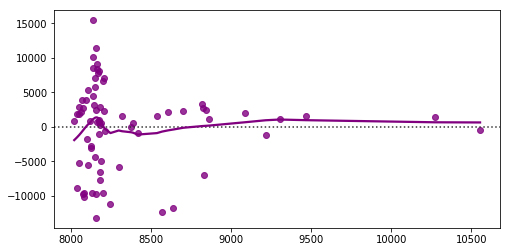

In [25]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=office_pred_nn, lowess=True, color="purple")

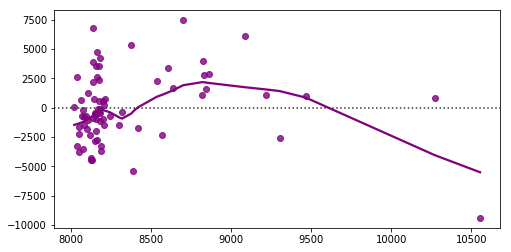

In [26]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=resident_pred_nn, lowess=True, color="purple")

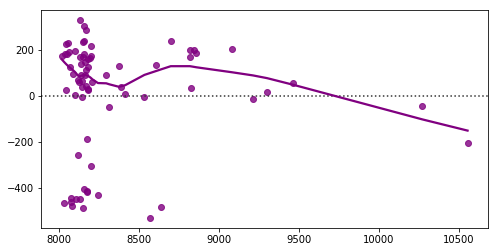

In [27]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=retail_pred_nn, lowess=True, color="purple")

## Gradient Boosting

In [28]:
food_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=random_seed)
grocery_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=random_seed)
health_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=random_seed)
school_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=random_seed)
lodge_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=random_seed)
office_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=random_seed)
resident_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=random_seed)
retail_grad = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=random_seed)

In [29]:
# Model Fitting
food_grad.fit(x_train_food, y_train_food)
grocery_grad.fit(x_train_grocery, y_train_grocery)
health_grad.fit(x_train_health, y_train_health)
school_grad.fit(x_train_school, y_train_school)
lodge_grad.fit(x_train_lodge, y_train_lodge)
office_grad.fit(x_train_office, y_train_office)
resident_grad.fit(x_train_resident, y_train_resident)
retail_grad.fit(x_train_retail, y_train_retail)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=213, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
# Predictions
food_pred_grad = food_grad.predict(x_test_food)
grocery_pred_grad = grocery_grad.predict(x_test_grocery)
health_pred_grad = health_grad.predict(x_test_health)
school_pred_grad = school_grad.predict(x_test_school)
lodge_pred_grad = lodge_grad.predict(x_test_lodge)
office_pred_grad = office_grad.predict(x_test_office)
resident_pred_grad = resident_grad.predict(x_test_resident)
retail_pred_grad = retail_grad.predict(x_test_retail)

In [31]:
# scoring
print(f"-----FOOD SERVICES-----")
print(f"Scoring on Training: {food_grad.score(x_train_food, y_train_food):.4f}")      
print(f"Scoring on Testing: {food_grad.score(x_test_food, y_test_food):.4f}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Scoring on Training: {grocery_grad.score(x_train_grocery, y_train_grocery):.4f}")      
print(f"Scoring on Testing: {grocery_grad.score(x_test_grocery, y_test_grocery):.4f}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Scoring on Training: {health_grad.score(x_train_health, y_train_health):.4f}")      
print(f"Scoring on Testing: {health_grad.score(x_test_health, y_test_health):.4f}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Scoring on Training: {school_grad.score(x_train_school, y_train_school):.4f}")      
print(f"Scoring on Testing: {school_grad.score(x_test_school, y_test_school):.4f}")
print("\n")

print(f"-----LODGING-----")
print(f"Scoring on Training: {lodge_grad.score(x_train_lodge, y_train_lodge):.4f}")      
print(f"Scoring on Testing: {lodge_grad.score(x_test_lodge, y_test_lodge):.4f}")
print("\n")

print(f"-----OFFICE-----")
print(f"Scoring on Training: {office_grad.score(x_train_office, y_train_office):.4f}")      
print(f"Scoring on Testing: {office_grad.score(x_test_office, y_test_office):.4f}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Scoring on Training: {resident_grad.score(x_train_resident, y_train_resident):.4f}")      
print(f"Scoring on Testing: {resident_grad.score(x_test_resident, y_test_resident):.4f}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Scoring on Training: {retail_grad.score(x_train_retail, y_train_retail):.4f}")      
print(f"Scoring on Testing: {retail_grad.score(x_test_retail, y_test_retail):.4f}")

-----FOOD SERVICES-----
Scoring on Training: 0.9988
Scoring on Testing: 0.9775


-----GROCERIES-----
Scoring on Training: 0.9982
Scoring on Testing: 0.9854


-----HEALTH CARE-----
Scoring on Training: 0.9969
Scoring on Testing: 0.9693


-----SCHOOL-----
Scoring on Training: 0.9969
Scoring on Testing: 0.9669


-----LODGING-----
Scoring on Training: 0.9950
Scoring on Testing: 0.9245


-----OFFICE-----
Scoring on Training: 0.9916
Scoring on Testing: 0.9085


-----RESIDENTIAL-----
Scoring on Training: 0.9983
Scoring on Testing: 0.9835


-----STAND ALONE RETAIL-----
Scoring on Training: 0.9964
Scoring on Testing: 0.9805


In [32]:
# performance
print(f"-----FOOD SERVICES-----")
print(f"Overall Training Accuracy for Neural Network: {food_grad.score(x_train_food, y_train_food).mean():.4f} +/- {food_grad.score(x_train_food, y_train_food).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {food_grad.score(x_test_food, y_test_food).mean():.4f} +/- {food_grad.score(x_test_food, y_test_food).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_food, food_pred_grad)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_food, food_pred_grad):.4f}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Overall Training Accuracy for Neural Network: {grocery_grad.score(x_train_grocery, y_train_grocery).mean():.4f} +/- {grocery_grad.score(x_train_grocery, y_train_grocery).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {grocery_grad.score(x_test_grocery, y_test_grocery).mean():.4f} +/- {grocery_grad.score(x_test_grocery, y_test_grocery).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_grocery, grocery_pred_grad)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_grocery, grocery_pred_grad):.4f}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Overall Training Accuracy for Neural Network: {health_grad.score(x_train_health, y_train_health).mean():.4f} +/- {health_grad.score(x_train_health, y_train_health).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {health_grad.score(x_test_health, y_test_health).mean():.4f} +/- {health_grad.score(x_test_health, y_test_health).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_health, health_pred_grad)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_health, health_pred_grad):.4f}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Overall Training Accuracy for Neural Network: {school_grad.score(x_train_school, y_train_school).mean():.4f} +/- {school_grad.score(x_train_school, y_train_school).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {school_grad.score(x_test_school, y_test_school).mean():.4f} +/- {school_grad.score(x_test_school, y_test_school).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_school, school_pred_grad)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_school, school_pred_grad):.4f}")
print("\n")

print(f"-----LODGING-----")
print(f"Overall Training Accuracy for Neural Network: {lodge_grad.score(x_train_lodge, y_train_lodge).mean():.4f} +/- {lodge_grad.score(x_train_lodge, y_train_lodge).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {lodge_grad.score(x_test_lodge, y_test_lodge).mean():.4f} +/- {lodge_grad.score(x_test_lodge, y_test_lodge).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_lodge, lodge_pred_grad)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_lodge, lodge_pred_grad):.4f}")
print("\n")

print(f"-----OFFICE-----")
print(f"Overall Training Accuracy for Neural Network: {office_grad.score(x_train_office, y_train_office).mean():.4f} +/- {office_grad.score(x_train_office, y_train_office).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {office_grad.score(x_test_office, y_test_office).mean():.4f} +/- {office_grad.score(x_test_office, y_test_office).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_office, office_pred_grad)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_office, office_pred_grad):.4f}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Overall Training Accuracy for Neural Network: {resident_grad.score(x_train_resident, y_train_resident).mean():.4f} +/- {resident_grad.score(x_train_resident, y_train_resident).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {resident_grad.score(x_test_resident, y_test_resident).mean():.4f} +/- {resident_grad.score(x_test_resident, y_test_resident).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_resident, resident_pred_grad)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_resident, resident_pred_grad):.4f}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Overall Training Accuracy for Neural Network: {retail_grad.score(x_train_retail, y_train_retail).mean():.4f} +/- {retail_grad.score(x_train_retail, y_train_retail).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {retail_grad.score(x_test_retail, y_test_retail).mean():.4f} +/- {retail_grad.score(x_test_retail, y_test_retail).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_retail, retail_pred_grad)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_retail, retail_pred_grad):.4f}")

-----FOOD SERVICES-----
Overall Training Accuracy for Neural Network: 0.9988 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9775 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 70.4266
---------------------------------------------
R2 Score for Neural Network: 0.9775


-----GROCERIES-----
Overall Training Accuracy for Neural Network: 0.9982 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9854 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 41.9580
---------------------------------------------
R2 Score for Neural Network: 0.9854


-----HEALTH CARE-----
Overall Training Accuracy for Neural Network: 0.9969 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9693 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 98.9538
---------------------------------------------
R2 Score for Neural Network: 0.9693


-----SCHOOL-----
Overall Training Accuracy for

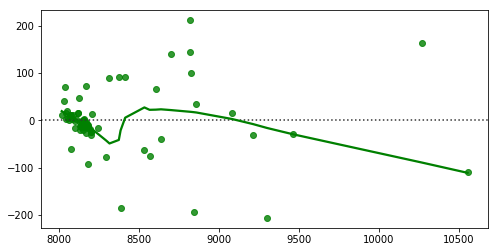

In [33]:
# Visualizations
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=food_pred_grad, lowess=True, color="green")

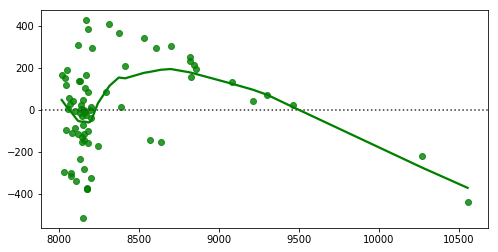

In [34]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=grocery_pred_grad, lowess=True, color="green")

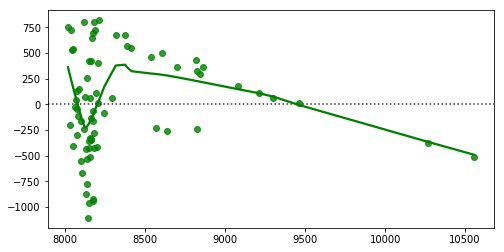

In [35]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=health_pred_grad, lowess=True, color="green")

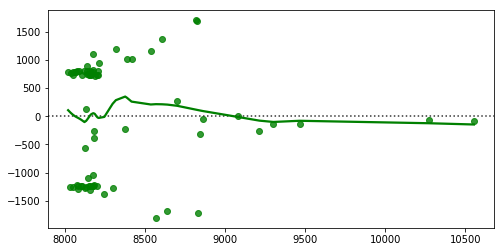

In [36]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=school_pred_grad, lowess=True, color="green")

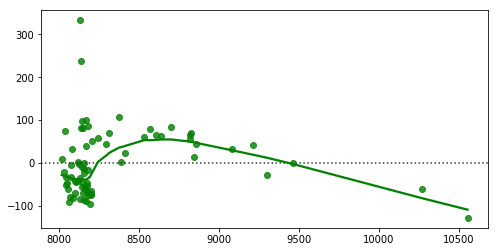

In [37]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=lodge_pred_grad, lowess=True, color="green")

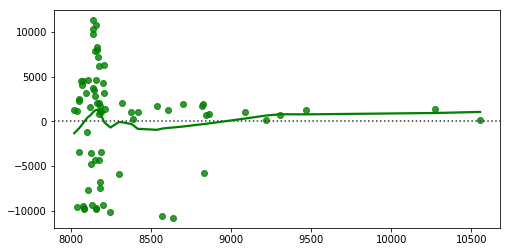

In [38]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=office_pred_grad, lowess=True, color="green")

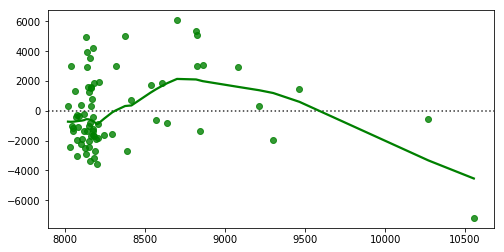

In [39]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=resident_pred_grad, lowess=True, color="green")

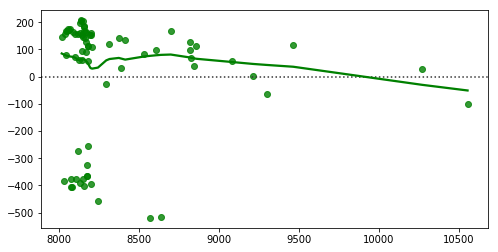

In [40]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=retail_pred_grad, lowess=True, color="green")

## Ada Boosting

In [41]:
food_ada = AdaBoostRegressor(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=random_seed)
grocery_ada = AdaBoostRegressor(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=random_seed)
health_ada = AdaBoostRegressor(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=random_seed)
school_ada = AdaBoostRegressor(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=random_seed)
lodge_ada = AdaBoostRegressor(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=random_seed)
office_ada = AdaBoostRegressor(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=random_seed)
resident_ada = AdaBoostRegressor(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=random_seed)
retail_ada = AdaBoostRegressor(n_estimators=100, base_estimator=None, learning_rate=0.1, random_state=random_seed)

In [42]:
# Model Fitting
food_ada.fit(x_train_food, y_train_food)
grocery_ada.fit(x_train_grocery, y_train_grocery)
health_ada.fit(x_train_health, y_train_health)
school_ada.fit(x_train_school, y_train_school)
lodge_ada.fit(x_train_lodge, y_train_lodge)
office_ada.fit(x_train_office, y_train_office)
resident_ada.fit(x_train_resident, y_train_resident)
retail_ada.fit(x_train_retail, y_train_retail)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=100, random_state=213)

In [43]:
# Predictions
food_pred_ada = food_ada.predict(x_test_food)
grocery_pred_ada = grocery_ada.predict(x_test_grocery)
health_pred_ada = health_ada.predict(x_test_health)
school_pred_ada = school_ada.predict(x_test_school)
lodge_pred_ada = lodge_ada.predict(x_test_lodge)
office_pred_ada = office_ada.predict(x_test_office)
resident_pred_ada = resident_ada.predict(x_test_resident)
retail_pred_ada = retail_ada.predict(x_test_retail)

In [44]:
# scoring
print(f"-----FOOD SERVICES-----")
print(f"Scoring on Training: {food_ada.score(x_train_food, y_train_food):.4f}")      
print(f"Scoring on Testing: {food_ada.score(x_test_food, y_test_food):.4f}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Scoring on Training: {grocery_ada.score(x_train_grocery, y_train_grocery):.4f}")      
print(f"Scoring on Testing: {grocery_ada.score(x_test_grocery, y_test_grocery):.4f}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Scoring on Training: {health_ada.score(x_train_health, y_train_health):.4f}")      
print(f"Scoring on Testing: {health_ada.score(x_test_health, y_test_health):.4f}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Scoring on Training: {school_ada.score(x_train_school, y_train_school):.4f}")      
print(f"Scoring on Testing: {school_ada.score(x_test_school, y_test_school):.4f}")
print("\n")

print(f"-----LODGING-----")
print(f"Scoring on Training: {lodge_ada.score(x_train_lodge, y_train_lodge):.4f}")      
print(f"Scoring on Testing: {lodge_ada.score(x_test_lodge, y_test_lodge):.4f}")
print("\n")

print(f"-----OFFICE-----")
print(f"Scoring on Training: {office_ada.score(x_train_office, y_train_office):.4f}")      
print(f"Scoring on Testing: {office_ada.score(x_test_office, y_test_office):.4f}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Scoring on Training: {resident_ada.score(x_train_resident, y_train_resident):.4f}")      
print(f"Scoring on Testing: {resident_ada.score(x_test_resident, y_test_resident):.4f}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Scoring on Training: {retail_ada.score(x_train_retail, y_train_retail):.4f}")      
print(f"Scoring on Testing: {retail_ada.score(x_test_retail, y_test_retail):.4f}")

-----FOOD SERVICES-----
Scoring on Training: 0.9832
Scoring on Testing: 0.9666


-----GROCERIES-----
Scoring on Training: 0.9463
Scoring on Testing: 0.9119


-----HEALTH CARE-----
Scoring on Training: 0.9451
Scoring on Testing: 0.8566


-----SCHOOL-----
Scoring on Training: 0.9352
Scoring on Testing: 0.8971


-----LODGING-----
Scoring on Training: 0.9406
Scoring on Testing: 0.8155


-----OFFICE-----
Scoring on Training: 0.8904
Scoring on Testing: 0.8767


-----RESIDENTIAL-----
Scoring on Training: 0.9720
Scoring on Testing: 0.9497


-----STAND ALONE RETAIL-----
Scoring on Training: 0.9530
Scoring on Testing: 0.9431


In [45]:
# performance
print(f"-----FOOD SERVICES-----")
print(f"Overall Training Accuracy for Neural Network: {food_ada.score(x_train_food, y_train_food).mean():.4f} +/- {food_ada.score(x_train_food, y_train_food).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {food_ada.score(x_test_food, y_test_food).mean():.4f} +/- {food_ada.score(x_test_food, y_test_food).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_food, food_pred_ada)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_food, food_pred_ada):.4f}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Overall Training Accuracy for Neural Network: {grocery_ada.score(x_train_grocery, y_train_grocery).mean():.4f} +/- {grocery_ada.score(x_train_grocery, y_train_grocery).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {grocery_ada.score(x_test_grocery, y_test_grocery).mean():.4f} +/- {grocery_ada.score(x_test_grocery, y_test_grocery).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_grocery, grocery_pred_ada)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_grocery, grocery_pred_ada):.4f}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Overall Training Accuracy for Neural Network: {health_ada.score(x_train_health, y_train_health).mean():.4f} +/- {health_ada.score(x_train_health, y_train_health).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {health_ada.score(x_test_health, y_test_health).mean():.4f} +/- {health_ada.score(x_test_health, y_test_health).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_health, health_pred_ada)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_health, health_pred_ada):.4f}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Overall Training Accuracy for Neural Network: {school_ada.score(x_train_school, y_train_school).mean():.4f} +/- {school_ada.score(x_train_school, y_train_school).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {school_ada.score(x_test_school, y_test_school).mean():.4f} +/- {school_ada.score(x_test_school, y_test_school).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_school, school_pred_ada)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_school, school_pred_ada):.4f}")
print("\n")

print(f"-----LODGING-----")
print(f"Overall Training Accuracy for Neural Network: {lodge_ada.score(x_train_lodge, y_train_lodge).mean():.4f} +/- {lodge_ada.score(x_train_lodge, y_train_lodge).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {lodge_ada.score(x_test_lodge, y_test_lodge).mean():.4f} +/- {lodge_ada.score(x_test_lodge, y_test_lodge).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_lodge, lodge_pred_ada)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_lodge, lodge_pred_ada):.4f}")
print("\n")

print(f"-----OFFICE-----")
print(f"Overall Training Accuracy for Neural Network: {office_ada.score(x_train_office, y_train_office).mean():.4f} +/- {office_ada.score(x_train_office, y_train_office).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {office_ada.score(x_test_office, y_test_office).mean():.4f} +/- {office_ada.score(x_test_office, y_test_office).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_office, office_pred_ada)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_office, office_pred_ada):.4f}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Overall Training Accuracy for Neural Network: {resident_ada.score(x_train_resident, y_train_resident).mean():.4f} +/- {resident_ada.score(x_train_resident, y_train_resident).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {resident_ada.score(x_test_resident, y_test_resident).mean():.4f} +/- {resident_ada.score(x_test_resident, y_test_resident).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_resident, resident_pred_ada)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_resident, resident_pred_ada):.4f}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Overall Training Accuracy for Neural Network: {retail_ada.score(x_train_retail, y_train_retail).mean():.4f} +/- {retail_ada.score(x_train_retail, y_train_retail).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {retail_ada.score(x_test_retail, y_test_retail).mean():.4f} +/- {retail_ada.score(x_test_retail, y_test_retail).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_retail, retail_pred_ada)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_retail, retail_pred_ada):.4f}")

-----FOOD SERVICES-----
Overall Training Accuracy for Neural Network: 0.9832 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9666 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 85.7173
---------------------------------------------
R2 Score for Neural Network: 0.9666


-----GROCERIES-----
Overall Training Accuracy for Neural Network: 0.9463 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9119 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 103.0873
---------------------------------------------
R2 Score for Neural Network: 0.9119


-----HEALTH CARE-----
Overall Training Accuracy for Neural Network: 0.9451 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.8566 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 213.9022
---------------------------------------------
R2 Score for Neural Network: 0.8566


-----SCHOOL-----
Overall Training Accuracy f

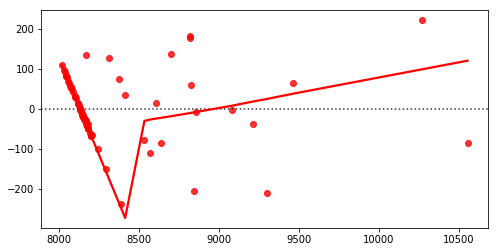

In [46]:
# Visualizations
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=food_pred_ada, lowess=True, color="red")

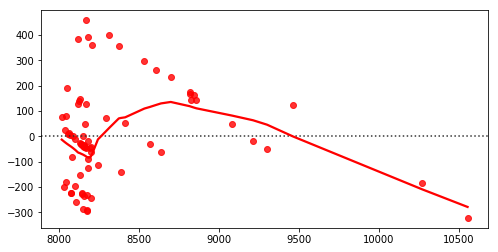

In [47]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=grocery_pred_ada, lowess=True, color="red")

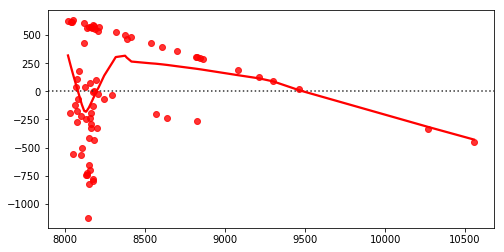

In [48]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=health_pred_ada, lowess=True, color="red")

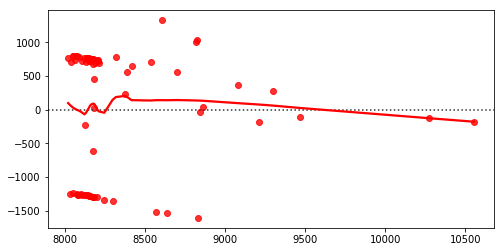

In [49]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=school_pred_ada, lowess=True, color="red")

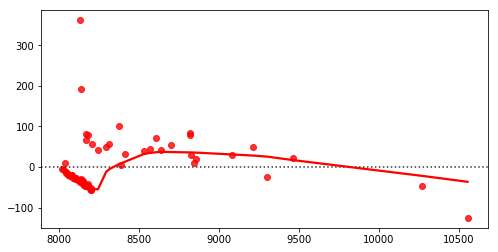

In [50]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=lodge_pred_ada, lowess=True, color="red")

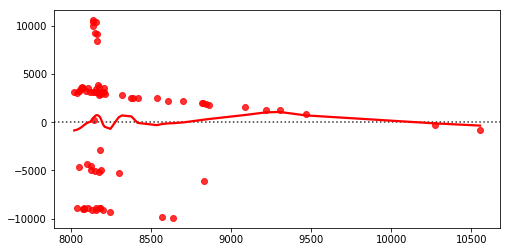

In [51]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=office_pred_ada, lowess=True, color="red")

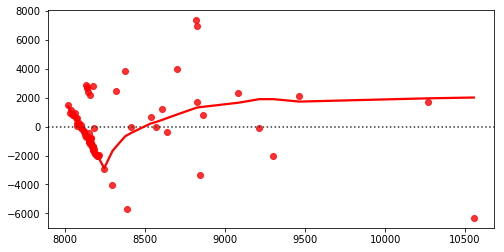

In [52]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=resident_pred_ada, lowess=True, color="red")

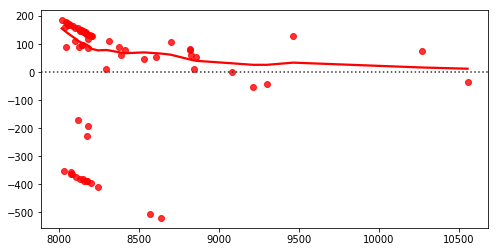

In [53]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=retail_pred_ada, lowess=True, color="red")

## Random Forest

In [54]:
food_rf = RandomForestRegressor(n_estimators = 100, max_depth = None, min_samples_split = 3, criterion = "mse", random_state = random_seed)
grocery_rf = RandomForestRegressor(n_estimators = 100, max_depth = None, min_samples_split = 3, criterion = "mse", random_state = random_seed)
health_rf = RandomForestRegressor(n_estimators = 100, max_depth = None, min_samples_split = 3, criterion = "mse", random_state = random_seed)
school_rf = RandomForestRegressor(n_estimators = 100, max_depth = None, min_samples_split = 3, criterion = "mse", random_state = random_seed)
lodge_rf = RandomForestRegressor(n_estimators = 100, max_depth = None, min_samples_split = 3, criterion = "mse", random_state = random_seed)
office_rf = RandomForestRegressor(n_estimators = 100, max_depth = None, min_samples_split = 3, criterion = "mse", random_state = random_seed)
resident_rf = RandomForestRegressor(n_estimators = 100, max_depth = None, min_samples_split = 3, criterion = "mse", random_state = random_seed)
retail_rf = RandomForestRegressor(n_estimators = 100, max_depth = None, min_samples_split = 3, criterion = "mse", random_state = random_seed)

In [55]:
# Model Fitting
food_rf.fit(x_train_food, y_train_food)
grocery_rf.fit(x_train_grocery, y_train_grocery)
health_rf.fit(x_train_health, y_train_health)
school_rf.fit(x_train_school, y_train_school)
lodge_rf.fit(x_train_lodge, y_train_lodge)
office_rf.fit(x_train_office, y_train_office)
resident_rf.fit(x_train_resident, y_train_resident)
retail_rf.fit(x_train_retail, y_train_retail)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=213, verbose=0, warm_start=False)

In [56]:
# Predictions
food_pred_rf = food_rf.predict(x_test_food)
grocery_pred_rf = grocery_rf.predict(x_test_grocery)
health_pred_rf = health_rf.predict(x_test_health)
school_pred_rf = school_rf.predict(x_test_school)
lodge_pred_rf = lodge_rf.predict(x_test_lodge)
office_pred_rf = office_rf.predict(x_test_office)
resident_pred_rf = resident_rf.predict(x_test_resident)
retail_pred_rf = retail_rf.predict(x_test_retail)

In [57]:
# scoring
print(f"-----FOOD SERVICES-----")
print(f"Scoring on Training: {food_rf.score(x_train_food, y_train_food):.4f}")      
print(f"Scoring on Testing: {food_rf.score(x_test_food, y_test_food):.4f}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Scoring on Training: {grocery_rf.score(x_train_grocery, y_train_grocery):.4f}")      
print(f"Scoring on Testing: {grocery_rf.score(x_test_grocery, y_test_grocery):.4f}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Scoring on Training: {health_rf.score(x_train_health, y_train_health):.4f}")      
print(f"Scoring on Testing: {health_rf.score(x_test_health, y_test_health):.4f}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Scoring on Training: {school_rf.score(x_train_school, y_train_school):.4f}")      
print(f"Scoring on Testing: {school_rf.score(x_test_school, y_test_school):.4f}")
print("\n")

print(f"-----LODGING-----")
print(f"Scoring on Training: {lodge_rf.score(x_train_lodge, y_train_lodge):.4f}")      
print(f"Scoring on Testing: {lodge_rf.score(x_test_lodge, y_test_lodge):.4f}")
print("\n")

print(f"-----OFFICE-----")
print(f"Scoring on Training: {office_rf.score(x_train_office, y_train_office):.4f}")      
print(f"Scoring on Testing: {office_rf.score(x_test_office, y_test_office):.4f}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Scoring on Training: {resident_rf.score(x_train_resident, y_train_resident):.4f}")      
print(f"Scoring on Testing: {resident_rf.score(x_test_resident, y_test_resident):.4f}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Scoring on Training: {retail_rf.score(x_train_retail, y_train_retail):.4f}")      
print(f"Scoring on Testing: {retail_rf.score(x_test_retail, y_test_retail):.4f}")

-----FOOD SERVICES-----
Scoring on Training: 0.9966
Scoring on Testing: 0.9763


-----GROCERIES-----
Scoring on Training: 0.9933
Scoring on Testing: 0.9687


-----HEALTH CARE-----
Scoring on Training: 0.9929
Scoring on Testing: 0.9148


-----SCHOOL-----
Scoring on Training: 0.9929
Scoring on Testing: 0.9773


-----LODGING-----
Scoring on Training: 0.9953
Scoring on Testing: 0.9190


-----OFFICE-----
Scoring on Training: 0.9839
Scoring on Testing: 0.9258


-----RESIDENTIAL-----
Scoring on Training: 0.9967
Scoring on Testing: 0.9782


-----STAND ALONE RETAIL-----
Scoring on Training: 0.9879
Scoring on Testing: 0.9767


In [58]:
# performance
print(f"-----FOOD SERVICES-----")
print(f"Overall Training Accuracy for Neural Network: {food_rf.score(x_train_food, y_train_food).mean():.4f} +/- {food_rf.score(x_train_food, y_train_food).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {food_rf.score(x_test_food, y_test_food).mean():.4f} +/- {food_rf.score(x_test_food, y_test_food).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_food, food_pred_rf)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_food, food_pred_rf):.4f}")
print("\n")

print(f"-----GROCERIES-----")
print(f"Overall Training Accuracy for Neural Network: {grocery_rf.score(x_train_grocery, y_train_grocery).mean():.4f} +/- {grocery_rf.score(x_train_grocery, y_train_grocery).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {grocery_rf.score(x_test_grocery, y_test_grocery).mean():.4f} +/- {grocery_rf.score(x_test_grocery, y_test_grocery).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_grocery, grocery_pred_rf)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_grocery, grocery_pred_rf):.4f}")
print("\n")

print(f"-----HEALTH CARE-----")
print(f"Overall Training Accuracy for Neural Network: {health_rf.score(x_train_health, y_train_health).mean():.4f} +/- {health_rf.score(x_train_health, y_train_health).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {health_rf.score(x_test_health, y_test_health).mean():.4f} +/- {health_rf.score(x_test_health, y_test_health).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_health, health_pred_rf)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_health, health_pred_rf):.4f}")
print("\n")

print(f"-----SCHOOL-----")
print(f"Overall Training Accuracy for Neural Network: {school_rf.score(x_train_school, y_train_school).mean():.4f} +/- {school_rf.score(x_train_school, y_train_school).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {school_rf.score(x_test_school, y_test_school).mean():.4f} +/- {school_rf.score(x_test_school, y_test_school).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_school, school_pred_rf)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_school, school_pred_rf):.4f}")
print("\n")

print(f"-----LODGING-----")
print(f"Overall Training Accuracy for Neural Network: {lodge_rf.score(x_train_lodge, y_train_lodge).mean():.4f} +/- {lodge_rf.score(x_train_lodge, y_train_lodge).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {lodge_rf.score(x_test_lodge, y_test_lodge).mean():.4f} +/- {lodge_rf.score(x_test_lodge, y_test_lodge).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_lodge, lodge_pred_rf)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_lodge, lodge_pred_rf):.4f}")
print("\n")

print(f"-----OFFICE-----")
print(f"Overall Training Accuracy for Neural Network: {office_rf.score(x_train_office, y_train_office).mean():.4f} +/- {office_rf.score(x_train_office, y_train_office).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {office_rf.score(x_test_office, y_test_office).mean():.4f} +/- {office_rf.score(x_test_office, y_test_office).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_office, office_pred_rf)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_office, office_pred_rf):.4f}")
print("\n")

print(f"-----RESIDENTIAL-----")
print(f"Overall Training Accuracy for Neural Network: {resident_rf.score(x_train_resident, y_train_resident).mean():.4f} +/- {resident_rf.score(x_train_resident, y_train_resident).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {resident_rf.score(x_test_resident, y_test_resident).mean():.4f} +/- {resident_rf.score(x_test_resident, y_test_resident).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_resident, resident_pred_rf)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_resident, resident_pred_rf):.4f}")
print("\n")

print(f"-----STAND ALONE RETAIL-----")
print(f"Overall Training Accuracy for Neural Network: {retail_rf.score(x_train_retail, y_train_retail).mean():.4f} +/- {retail_rf.score(x_train_retail, y_train_retail).std()*2:.4f}")
print(f"Overall Testing Accuracy for Neural Network: {retail_rf.score(x_test_retail, y_test_retail).mean():.4f} +/- {retail_rf.score(x_test_retail, y_test_retail).std()*2:.4f}")
print(f"---------------------------------------------")
print(f"RMSE for Neural Network model: {math.sqrt(mean_squared_error(y_test_retail, retail_pred_rf)):.4f}")
print(f"---------------------------------------------")
print(f"R2 Score for Neural Network: {r2_score(y_test_retail, retail_pred_rf):.4f}")

-----FOOD SERVICES-----
Overall Training Accuracy for Neural Network: 0.9966 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9763 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 72.2036
---------------------------------------------
R2 Score for Neural Network: 0.9763


-----GROCERIES-----
Overall Training Accuracy for Neural Network: 0.9933 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9687 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 61.4170
---------------------------------------------
R2 Score for Neural Network: 0.9687


-----HEALTH CARE-----
Overall Training Accuracy for Neural Network: 0.9929 +/- 0.0000
Overall Testing Accuracy for Neural Network: 0.9148 +/- 0.0000
---------------------------------------------
RMSE for Neural Network model: 164.9056
---------------------------------------------
R2 Score for Neural Network: 0.9148


-----SCHOOL-----
Overall Training Accuracy fo

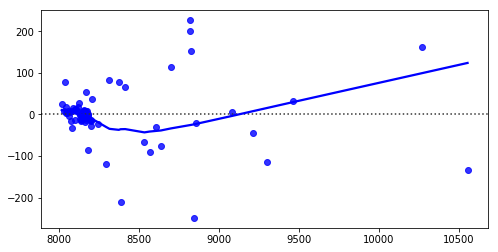

In [59]:
# Visualizations
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=food_pred_rf, lowess=True, color="blue")

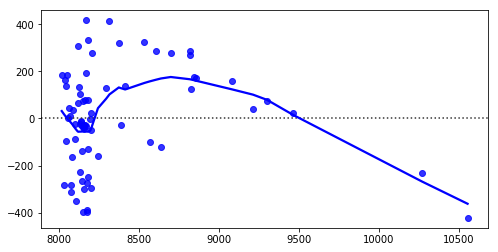

In [60]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=grocery_pred_rf, lowess=True, color="blue")

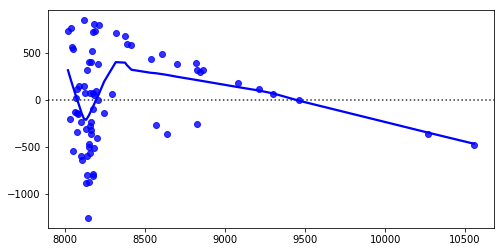

In [61]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=health_pred_rf, lowess=True, color="blue")

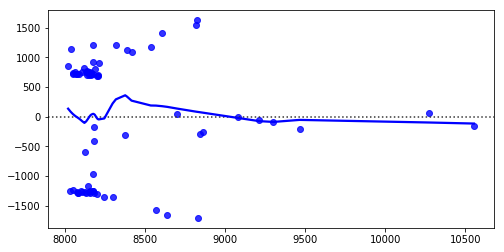

In [62]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=school_pred_rf, lowess=True, color="blue")

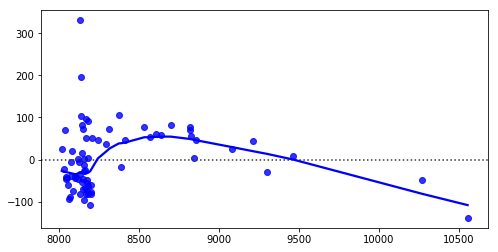

In [63]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=lodge_pred_rf, lowess=True, color="blue")

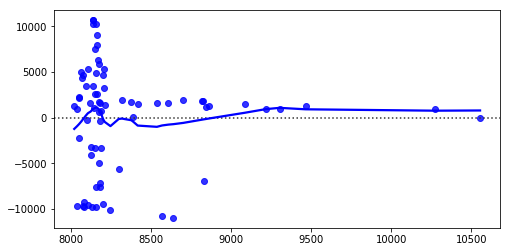

In [64]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=office_pred_rf, lowess=True, color="blue")

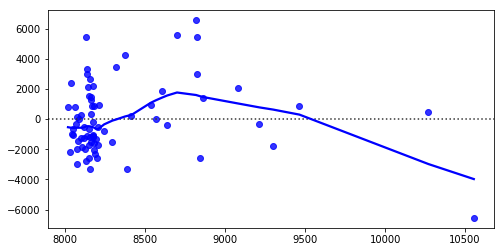

In [65]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=resident_pred_rf, lowess=True, color="blue")

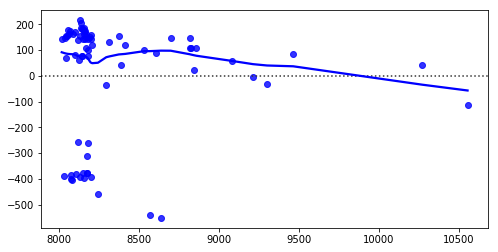

In [66]:
plt.figure(figsize=[8,4])
sns.residplot(x=y_test_food, y=retail_pred_rf, lowess=True, color="blue")

# Prediction Using Scenario Dataset
Given the Random Forest model from Grid Search performed the best, we will use this model to predict the various dates Power City has asked us to make
<br>Dates
<ul>
<li>March 15th</li>
<li>June 26th</li>
<li>July 3rd</li>
<li>October 13th</li>
<li>November 19th</li>
<li>December 25th</li>
</ul>

In [22]:
solar_scenario.head()

,Date_Time,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Precipitation_AVG,Pressure_AVG,Temperature_AVG,Visibility_AVG,Wind_Speed_AVG,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,01/01/91,-18.844183,0.979167,-4.008333,0.873212,0.233333,980.695833,-2.175000,4.957208,5.0750,...,0,0,1,0,0,0,0,0,0,1
1,01/02/91,-18.799372,0.639583,-11.020833,0.781908,0.000000,997.629167,-7.816667,9.914292,2.8250,...,0,0,0,1,0,0,0,0,0,1
2,01/03/91,-18.748491,0.560417,-14.750000,0.780521,0.000000,1003.129167,-11.566667,13.095667,3.9000,...,0,0,0,0,0,0,0,0,0,1
3,01/04/91,-18.628599,0.710417,-10.266667,0.656300,0.000000,993.345833,-4.766667,16.077500,5.6750,...,0,0,0,0,1,0,0,0,0,1
4,01/05/91,-18.559631,1.000000,-2.154167,0.772842,0.012500,983.987500,1.641667,10.233458,5.4875,...,0,0,0,0,0,1,0,0,0,1


### Predicting Dates

In [67]:
# March 15th
march15_food = food_scenario[food_scenario["Date_Time"] == "03/15/91"].drop(columns=["Date_Time"])
march15_grocery = grocery_scenario[grocery_scenario["Date_Time"] == "03/15/91"].drop(columns=["Date_Time"])
march15_health = health_scenario[health_scenario["Date_Time"] == "03/15/91"].drop(columns=["Date_Time"])
march15_school = school_scenario[school_scenario["Date_Time"] == "03/15/91"].drop(columns=["Date_Time"])
march15_lodge = lodge_scenario[lodge_scenario["Date_Time"] == "03/15/91"].drop(columns=["Date_Time"])
march15_office = office_scenario[office_scenario["Date_Time"] == "03/15/91"].drop(columns=["Date_Time"])
march15_resident = resident_scenario[resident_scenario["Date_Time"] == "03/15/91"].drop(columns=["Date_Time"])
march15_retail = retail_scenario[retail_scenario["Date_Time"] == "03/15/91"].drop(columns=["Date_Time"])

In [68]:
# June 16th
june26_food = food_scenario[food_scenario["Date_Time"] == "06/26/91"].drop(columns=["Date_Time"])
june26_grocery = grocery_scenario[grocery_scenario["Date_Time"] == "06/26/91"].drop(columns=["Date_Time"])
june26_health = health_scenario[health_scenario["Date_Time"] == "06/26/91"].drop(columns=["Date_Time"])
june26_school = school_scenario[school_scenario["Date_Time"] == "06/26/91"].drop(columns=["Date_Time"])
june26_lodge = lodge_scenario[lodge_scenario["Date_Time"] == "06/26/91"].drop(columns=["Date_Time"])
june26_office = office_scenario[office_scenario["Date_Time"] == "06/26/91"].drop(columns=["Date_Time"])
june26_resident = resident_scenario[resident_scenario["Date_Time"] == "06/26/91"].drop(columns=["Date_Time"])
june26_retail = retail_scenario[retail_scenario["Date_Time"] == "06/26/91"].drop(columns=["Date_Time"])

In [69]:
# July 3rd
july3_food = food_scenario[food_scenario["Date_Time"] == "07/03/91"].drop(columns=["Date_Time"])
july3_grocery = grocery_scenario[grocery_scenario["Date_Time"] == "07/03/91"].drop(columns=["Date_Time"])
july3_health = health_scenario[health_scenario["Date_Time"] == "07/03/91"].drop(columns=["Date_Time"])
july3_school = school_scenario[school_scenario["Date_Time"] == "07/03/91"].drop(columns=["Date_Time"])
july3_lodge = lodge_scenario[lodge_scenario["Date_Time"] == "07/03/91"].drop(columns=["Date_Time"])
july3_office = office_scenario[office_scenario["Date_Time"] == "07/03/91"].drop(columns=["Date_Time"])
july3_resident = resident_scenario[resident_scenario["Date_Time"] == "07/03/91"].drop(columns=["Date_Time"])
july3_retail = retail_scenario[retail_scenario["Date_Time"] == "07/03/91"].drop(columns=["Date_Time"])

In [70]:
# October 13th
october13_food = food_scenario[food_scenario["Date_Time"] == "10/13/91"].drop(columns=["Date_Time"])
october13_grocery = grocery_scenario[grocery_scenario["Date_Time"] == "10/13/91"].drop(columns=["Date_Time"])
october13_health = health_scenario[health_scenario["Date_Time"] == "10/13/91"].drop(columns=["Date_Time"])
october13_school = school_scenario[school_scenario["Date_Time"] == "10/13/91"].drop(columns=["Date_Time"])
october13_lodge = lodge_scenario[lodge_scenario["Date_Time"] == "10/13/91"].drop(columns=["Date_Time"])
october13_office = office_scenario[office_scenario["Date_Time"] == "10/13/91"].drop(columns=["Date_Time"])
october13_resident = resident_scenario[resident_scenario["Date_Time"] == "10/13/91"].drop(columns=["Date_Time"])
october13_retail = retail_scenario[retail_scenario["Date_Time"] == "10/13/91"].drop(columns=["Date_Time"])

In [71]:
# November 19th
november19_food = food_scenario[food_scenario["Date_Time"] == "11/19/91"].drop(columns=["Date_Time"])
november19_grocery = grocery_scenario[grocery_scenario["Date_Time"] == "11/19/91"].drop(columns=["Date_Time"])
november19_health = health_scenario[health_scenario["Date_Time"] == "11/19/91"].drop(columns=["Date_Time"])
november19_school = school_scenario[school_scenario["Date_Time"] == "11/19/91"].drop(columns=["Date_Time"])
november19_lodge = lodge_scenario[lodge_scenario["Date_Time"] == "11/19/91"].drop(columns=["Date_Time"])
november19_office = office_scenario[office_scenario["Date_Time"] == "11/19/91"].drop(columns=["Date_Time"])
november19_resident = resident_scenario[resident_scenario["Date_Time"] == "11/19/91"].drop(columns=["Date_Time"])
november19_retail = retail_scenario[retail_scenario["Date_Time"] == "11/19/91"].drop(columns=["Date_Time"])

In [72]:
# Chistmas Day - December 25th
december25_food = food_scenario[food_scenario["Date_Time"] == "12/25/91"].drop(columns=["Date_Time"])
december25_grocery = grocery_scenario[grocery_scenario["Date_Time"] == "12/25/91"].drop(columns=["Date_Time"])
december25_health = health_scenario[health_scenario["Date_Time"] == "12/25/91"].drop(columns=["Date_Time"])
december25_school = school_scenario[school_scenario["Date_Time"] == "12/25/91"].drop(columns=["Date_Time"])
december25_lodge = lodge_scenario[lodge_scenario["Date_Time"] == "12/25/91"].drop(columns=["Date_Time"])
december25_office = office_scenario[office_scenario["Date_Time"] == "12/25/91"].drop(columns=["Date_Time"])
december25_resident = resident_scenario[resident_scenario["Date_Time"] == "12/25/91"].drop(columns=["Date_Time"])
december25_retail = retail_scenario[retail_scenario["Date_Time"] == "12/25/91"].drop(columns=["Date_Time"])

### March 15th

In [74]:
pred_food_315 = food_rf.predict(march15_food)
pred_grocery_315 = grocery_rf.predict(march15_grocery)
pred_health_315 = health_rf.predict(march15_health)
pred_school_315 = school_rf.predict(march15_school)
pred_lodge_315 = lodge_rf.predict(march15_lodge)
pred_office_315 = office_rf.predict(march15_office)
pred_resident_315 = resident_rf.predict(march15_resident)
pred_retail_315 = retail_rf.predict(march15_retail)

print(f"Predicted Consumption for the Food Sector - March 15th: {pred_food_315}")
print(f"Predicted Consumption for the Grocery Sector - March 15th: {pred_grocery_315}")
print(f"Predicted Consumption for the Health Sector - March 15th: {pred_health_315}")
print(f"Predicted Consumption for the School Sector - March 15th: {pred_school_315}")
print(f"Predicted Consumption for the Lodging Sector - March 15th: {pred_lodge_315}")
print(f"Predicted Consumption for the Office Sector - March 15th: {pred_office_315}")
print(f"Predicted Consumption for the Residential Sector - March 15th: {pred_resident_315}")
print(f"Predicted Consumption for the Retail Sector - March 15th: {pred_retail_315}")
print("\n")
print(f"Total Consumption Output for all sectors: {pred_food_315+pred_grocery_315+pred_health_315+pred_school_315+pred_lodge_315+pred_office_315+pred_resident_315+pred_retail_315}")

Predicted Consumption for the Food Sector - March 15th: [8078.37685713]
Predicted Consumption for the Grocery Sector - March 15th: [1697.56606482]
Predicted Consumption for the Health Sector - March 15th: [3230.08061185]
Predicted Consumption for the School Sector - March 15th: [1727.04172974]
Predicted Consumption for the Lodging Sector - March 15th: [1289.39357205]
Predicted Consumption for the Office Sector - March 15th: [7608.79250672]
Predicted Consumption for the Residential Sector - March 15th: [59103.64544111]
Predicted Consumption for the Retail Sector - March 15th: [903.7347543]


Total Consumption Output for all sectors: [83638.63153772]


### June 26th

In [76]:
pred_food_626 = food_rf.predict(june26_food)
pred_grocery_626 = grocery_rf.predict(june26_grocery)
pred_health_626 = health_rf.predict(june26_health)
pred_school_626 = school_rf.predict(june26_school)
pred_lodge_626 = lodge_rf.predict(june26_lodge)
pred_office_626 = office_rf.predict(june26_office)
pred_resident_626 = resident_rf.predict(june26_resident)
pred_retail_626 = retail_rf.predict(june26_retail)

print(f"Predicted Consumption for the Food Sector - June 26th: {pred_food_626}")
print(f"Predicted Consumption for the Grocery Sector - June 26th: {pred_grocery_626}")
print(f"Predicted Consumption for the Health Sector - June 26th: {pred_health_626}")
print(f"Predicted Consumption for the School Sector - June 26th: {pred_school_626}")
print(f"Predicted Consumption for the Lodging Sector - June 26th: {pred_lodge_626}")
print(f"Predicted Consumption for the Office Sector - June 26th: {pred_office_626}")
print(f"Predicted Consumption for the Residential Sector - June 26th: {pred_resident_626}")
print(f"Predicted Consumption for the Retail Sector - June 26th: {pred_retail_626}")

Predicted Consumption for the Food Sector - June 26th: [9432.98866455]
Predicted Consumption for the Grocery Sector - June 26th: [2795.32080759]
Predicted Consumption for the Health Sector - June 26th: [4680.69582002]
Predicted Consumption for the School Sector - June 26th: [5136.0018587]
Predicted Consumption for the Lodging Sector - June 26th: [1713.4524231]
Predicted Consumption for the Office Sector - June 26th: [19352.80502925]
Predicted Consumption for the Residential Sector - June 26th: [85158.3892867]
Predicted Consumption for the Retail Sector - June 26th: [1772.7410291]


### July 3rd

In [77]:
pred_food_703 = food_rf.predict(july3_food)
pred_grocery_703 = grocery_rf.predict(july3_grocery)
pred_health_703 = health_rf.predict(july3_health)
pred_school_703 = school_rf.predict(july3_school)
pred_lodge_703 = lodge_rf.predict(july3_lodge)
pred_office_703 = office_rf.predict(july3_office)
pred_resident_703 = resident_rf.predict(july3_resident)
pred_retail_703 = retail_rf.predict(july3_retail)

print(f"Predicted Consumption for the Food Sector - July 3rd: {pred_food_703}")
print(f"Predicted Consumption for the Grocery Sector - July 3rd: {pred_grocery_703}")
print(f"Predicted Consumption for the Health Sector - July 3rd: {pred_health_703}")
print(f"Predicted Consumption for the School Sector - July 3rd: {pred_school_703}")
print(f"Predicted Consumption for the Lodging Sector - July 3rd: {pred_lodge_703}")
print(f"Predicted Consumption for the Office Sector - July 3rd: {pred_office_703}")
print(f"Predicted Consumption for the Residential Sector - July 3rd: {pred_resident_703}")
print(f"Predicted Consumption for the Retail Sector - July 3rd: {pred_retail_703}")

Predicted Consumption for the Food Sector - July 3rd: [8357.79678823]
Predicted Consumption for the Grocery Sector - July 3rd: [2334.06367978]
Predicted Consumption for the Health Sector - July 3rd: [4376.41106063]
Predicted Consumption for the School Sector - July 3rd: [3495.91217831]
Predicted Consumption for the Lodging Sector - July 3rd: [1456.67826612]
Predicted Consumption for the Office Sector - July 3rd: [10636.5160203]
Predicted Consumption for the Residential Sector - July 3rd: [66088.9941977]
Predicted Consumption for the Retail Sector - July 3rd: [1248.04190615]


### October 13th

In [78]:
pred_food_1013 = food_rf.predict(october13_food)
pred_grocery_1013 = grocery_rf.predict(october13_grocery)
pred_health_1013 = health_rf.predict(october13_health)
pred_school_1013 = school_rf.predict(october13_school)
pred_lodge_1013 = lodge_rf.predict(october13_lodge)
pred_office_1013 = office_rf.predict(october13_office)
pred_resident_1013 = resident_rf.predict(october13_resident)
pred_retail_1013 = retail_rf.predict(october13_retail)

print(f"Predicted Consumption for the Food Sector - October 13th: {pred_food_1013}")
print(f"Predicted Consumption for the Grocery Sector - October 13th: {pred_grocery_1013}")
print(f"Predicted Consumption for the Health Sector - October 13th: {pred_health_1013}")
print(f"Predicted Consumption for the School Sector - October 13th: {pred_school_1013}")
print(f"Predicted Consumption for the Lodging Sector - October 13th: {pred_lodge_1013}")
print(f"Predicted Consumption for the Office Sector - October 13th: {pred_office_1013}")
print(f"Predicted Consumption for the Residential Sector - October 13th: {pred_resident_1013}")
print(f"Predicted Consumption for the Retail Sector - October 13th: {pred_retail_1013}")

Predicted Consumption for the Food Sector - October 13th: [8252.45349454]
Predicted Consumption for the Grocery Sector - October 13th: [2364.75973732]
Predicted Consumption for the Health Sector - October 13th: [4839.15793178]
Predicted Consumption for the School Sector - October 13th: [4030.85834804]
Predicted Consumption for the Lodging Sector - October 13th: [1430.74912786]
Predicted Consumption for the Office Sector - October 13th: [17044.62505983]
Predicted Consumption for the Residential Sector - October 13th: [63362.06709891]
Predicted Consumption for the Retail Sector - October 13th: [1444.39073794]


### November 19th

In [79]:
pred_food_1119 = food_rf.predict(november19_food)
pred_grocery_1119 = grocery_rf.predict(november19_grocery)
pred_health_1119 = health_rf.predict(november19_health)
pred_school_1119 = school_rf.predict(november19_school)
pred_lodge_1119 = lodge_rf.predict(november19_lodge)
pred_office_1119 = office_rf.predict(november19_office)
pred_resident_1119 = resident_rf.predict(november19_resident)
pred_retail_1119 = retail_rf.predict(november19_retail)

print(f"Predicted Consumption for the Food Sector - November 19th: {pred_food_1119}")
print(f"Predicted Consumption for the Grocery Sector - November 19th: {pred_grocery_1119}")
print(f"Predicted Consumption for the Health Sector - November 19th: {pred_health_1119}")
print(f"Predicted Consumption for the School Sector - November 19th: {pred_school_1119}")
print(f"Predicted Consumption for the Lodging Sector - November 19th: {pred_lodge_1119}")
print(f"Predicted Consumption for the Office Sector - November 19th: {pred_office_1119}")
print(f"Predicted Consumption for the Residential Sector - November 19th: {pred_resident_1119}")
print(f"Predicted Consumption for the Retail Sector - November 19th: {pred_retail_1119}")

Predicted Consumption for the Food Sector - November 19th: [8154.23974453]
Predicted Consumption for the Grocery Sector - November 19th: [2073.60940849]
Predicted Consumption for the Health Sector - November 19th: [3887.01095468]
Predicted Consumption for the School Sector - November 19th: [3714.74920068]
Predicted Consumption for the Lodging Sector - November 19th: [1290.47345298]
Predicted Consumption for the Office Sector - November 19th: [20983.43761692]
Predicted Consumption for the Residential Sector - November 19th: [61368.19626554]
Predicted Consumption for the Retail Sector - November 19th: [1479.47147188]


### December 25th

In [80]:
pred_food_1225 = food_rf.predict(december25_food)
pred_grocery_1225 = grocery_rf.predict(december25_grocery)
pred_health_1225 = health_rf.predict(december25_health)
pred_school_1225 = school_rf.predict(december25_school)
pred_lodge_1225 = lodge_rf.predict(december25_lodge)
pred_office_1225 = office_rf.predict(december25_office)
pred_resident_1225 = resident_rf.predict(december25_resident)
pred_retail_1225 = retail_rf.predict(december25_retail)

print(f"Predicted Consumption for the Food Sector - December 25th: {pred_food_1225}")
print(f"Predicted Consumption for the Grocery Sector - December 25th: {pred_grocery_1225}")
print(f"Predicted Consumption for the Health Sector - December 25th: {pred_health_1225}")
print(f"Predicted Consumption for the School Sector - December 25th: {pred_school_1225}")
print(f"Predicted Consumption for the Lodging Sector - December 25th: {pred_lodge_1225}")
print(f"Predicted Consumption for the Office Sector - December 25th: {pred_office_1225}")
print(f"Predicted Consumption for the Residential Sector - December 25th: {pred_resident_1225}")
print(f"Predicted Consumption for the Retail Sector - December 25th: {pred_retail_1225}")

Predicted Consumption for the Food Sector - December 25th: [8181.78021252]
Predicted Consumption for the Grocery Sector - December 25th: [2085.55106637]
Predicted Consumption for the Health Sector - December 25th: [3757.28151667]
Predicted Consumption for the School Sector - December 25th: [3700.18845741]
Predicted Consumption for the Lodging Sector - December 25th: [1313.88971223]
Predicted Consumption for the Office Sector - December 25th: [20992.8449421]
Predicted Consumption for the Residential Sector - December 25th: [62042.20917615]
Predicted Consumption for the Retail Sector - December 25th: [1476.36496423]
